## Link Dataset
https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction

## Mô tả Dataset
![image](./introduction.jpeg)

Engineering Graduate Salary là bộ dataset chứa các thông tin học vấn, điểm số học tập và lương của các kĩ sư tại Ấn Độ.

Giúp ta hiểu những gì ảnh hưởng đến lương và công việc trong thị trường việc làm (tại Ấn Độ).

Dataset có thể sử dụng để xây dựng mô hình hồi quy dự đoán lương của kĩ sư ra trường.

Đơn vị tiền là Rupee (1 Rupee ~ 301,20 VNĐ)

## Các thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from numpy.random import choice
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(561)
sns.set(rc={"figure.figsize":(10, 8)})

## Đọc file dữ liệu

Đọc CSV

In [2]:
dataset = pd.read_csv("./Engineering_graduate_salary.csv")

In [3]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Số record

In [4]:
print("Số mẫu dataset : ",len(dataset))

Số mẫu dataset :  2998


Các cột của dataset

In [5]:
print(list(dataset))

['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


## Làm sạch dữ liệu

Xóa các cột dữ liệu không cần thiết

In [6]:
unnecessary_column = ["ID","DOB", "10percentage", "10board", "12graduation", 
                      "12percentage", "12board", "CollegeID", "CollegeCityID", 
                      "CollegeCityTier", "CollegeState", "Degree", "GraduationYear",
                      "English", "Logical", "Quant", "Domain", "ComputerProgramming", 
                      "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", 
                      "ElectricalEngg", "TelecomEngg", "CivilEngg", "conscientiousness",
                      "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]
dataset = dataset.drop(unnecessary_column, axis=1)

Format lại các giá trị cần thiết

In [7]:
# Format giới tính
dataset["Gender"] = dataset["Gender"].apply(lambda g:"Male" if g=="m" else "Female")

# Format chuyên ngành, viết hoa chữ đầu tiên của mỗi từ
dataset["Specialization"] = dataset["Specialization"].apply(lambda s:s.title())

# Dataset cuối cùng ta sẽ sử dụng
dataset.head()

,Gender,CollegeTier,Specialization,collegeGPA,Salary
0,Female,1,Instrumentation And Control Engineering,73.82,445000
1,Male,2,Computer Science & Engineering,65.00,110000
2,Male,2,Electronics & Telecommunications,61.94,255000
3,Male,1,Computer Science & Engineering,80.40,420000
4,Female,2,Biotechnology,64.30,200000


Thông tin dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2998 non-null   object 
 1   CollegeTier     2998 non-null   int64  
 2   Specialization  2998 non-null   object 
 3   collegeGPA      2998 non-null   float64
 4   Salary          2998 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 117.2+ KB


Kiểm tra lại dataset có dữ liệu null không

In [9]:
dataset.isnull().sum()

Gender            0
CollegeTier       0
Specialization    0
collegeGPA        0
Salary            0
dtype: int64

## Phương pháp lấy mẫu Bootstrap

#### Hàm bootstrap

In [10]:
def Bootstrap_Statistic(n,M,x):
    """
    n : kích thước mẫu
    M : số lần lấy mẫu bootstrap
    x : khoảng tin cậy
    """
    # Mảng 2 chiều chứa M mẫu kích thước n
    sample = np.array([np.zeros(n)]*M)
    # Mảng chứa M giá trị trung bình
    sample_mean = np.zeros(M)
    for i in range(M):
        # Chọn ra ngẫu nhiên n mẫu
        sample[i] = choice(dataset["Salary"], size=n)
        # Tính trung bình của n mẫu đó
        sample_mean[i] = np.mean(sample[i])

    # print(sample.shape, sample)
    # print(sample_mean.shape, sample_mean)

    # Mức lương trung bình và xác xuất tương ứng
    prob, salary = np.histogram(sample_mean)
    prob = np.array(prob, dtype=float)
    prob /= np.sum(prob)

    # Đồ thị histogram và đường KDE
    plt.figure(figsize=(10, 8))
    plt.title("Phân bố lấy mẫu")
    sns.histplot(data=sample_mean, kde=True, stat="probability")
    plt.xlabel("Lương trung bình")
    plt.ylabel("Xác suất")

    # Mức ý nghĩa
    alpha = (100-x)/2
    # 2 biên khoảng tin cậy

    # Sắp xếp sample_mean tăng dần rồi cắt đi 2 đầu
    sample_mean_asc = np.sort(sample_mean)
    lower_bound = sample_mean_asc[int(alpha/100*M)]
    upper_bound = sample_mean_asc[int((1-alpha/100)*M)]

    # Sử dụng hàm Numpy Percentile
    # lower_bound = np.percentile(sample_mean, alpha)
    # upper_bound = np.percentile(sample_mean, 100-alpha)
    plt.axvline(lower_bound, color="red", linewidth=2)
    plt.axvline(upper_bound, color="red", linewidth=2)
    
    # Trả về phân bố lấy mẫu, cận trên, cận dưới
    return prob, salary, lower_bound, upper_bound

#### Histogram, đường cong ước lượng mật độ hạt nhân (KDE) và dải tin cậy của Salary (lương)
Phân bố lấy mẫu xấp xỉ phân phối chuẩn theo đúng định lý giới hạn trung tâm.

>> Dải tin cậy :  294590.0  -  316880.0
>> Phân bố lấy mẫu :
278610.0 - 0.06 (%)
284162.5 - 0.54 (%)
289715.0 - 5.62 (%)
295267.5 - 19.48 (%)
300820.0 - 31.68 (%)
306372.5 - 25.86 (%)
311925.0 - 12.38 (%)
317477.5 - 3.84 (%)
323030.0 - 0.42 (%)
328582.5 - 0.12 (%)


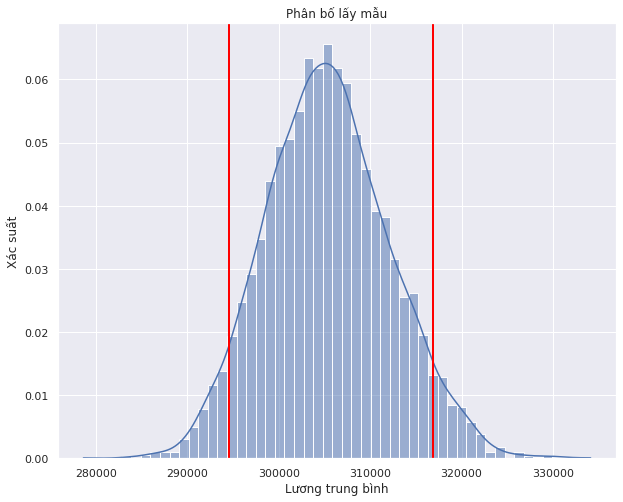

In [69]:
# Phương pháp Boootstrap với kích thước mẫu 1000, số lần lấy mẫu 5000 và dải tin cậy 90%
prob, salary, lower_bound, upper_bound = Bootstrap_Statistic(1000, 5000, 90)
print(">> Dải tin cậy : ",lower_bound," - ",upper_bound)
print(">> Phân bố lấy mẫu :")
for p, s in zip(prob, salary):
    print(f"{s} - {round(p*100, 2)} (%)")

## Thống kê mô tả (Descriptive Statistics) 

#### Số lượng kĩ sư Nam nhiều hơn kĩ sư Nữ.

Một điều khá dễ hiểu đối với các khối ngành về kĩ thuật.

Text(0, 0.5, 'Số lượng')

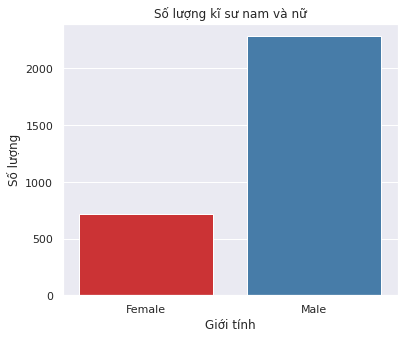

In [12]:
plt.figure(figsize=(6, 5))
plt.title("Số lượng kĩ sư nam và nữ")
sns.countplot(x="Gender", data=dataset, palette="Set1")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")

#### 5 ngành học hot nhất và số lượng kĩ sư Nam/Nữ theo học
- 5 ngành học hot nhất chủ yếu liên quan đến máy tính

- Số kĩ sư nữ ít hơn kĩ sư nam rất nhiều, chỉ bằng khoảng 1/3 số lượng kĩ sư Nam tương ứng cùng ngành.

Text(0, 0.5, 'Số lượng')

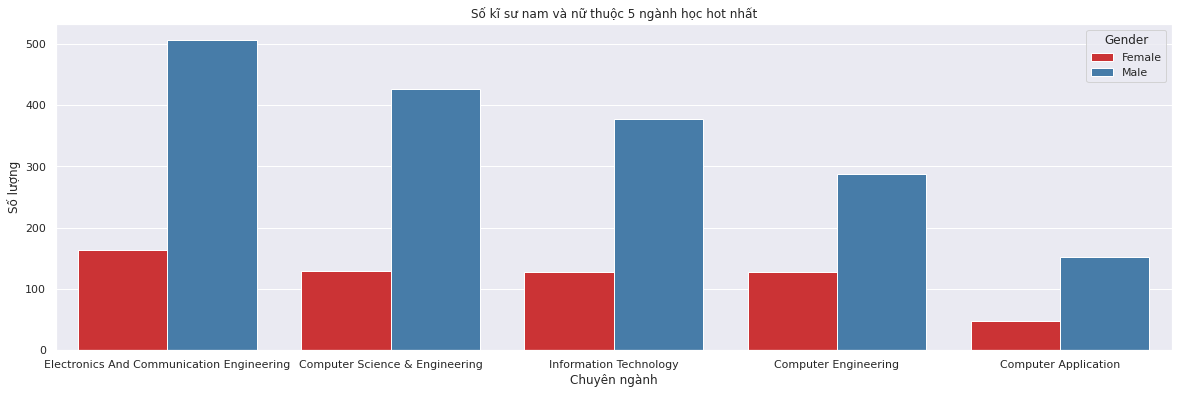

In [13]:
plt.figure(figsize=(20, 6))
plt.title("Số kĩ sư nam và nữ thuộc 5 ngành học hot nhất")
# Dùng thuộc tính order để giới hạn số lượng Group được vẽ ra
plot = sns.countplot(data=dataset, x="Specialization", hue="Gender", palette="Set1",
              order=pd.value_counts(dataset["Specialization"]).iloc[:5].index)
plt.xlabel("Chuyên ngành")
plt.ylabel("Số lượng")

#### Số kĩ sư học các Tier trường cao đẳng
- Một điều khá dễ hiểu nữa là số kĩ sư học từ trường Tier 2 nhiều hơn áp đảo so với trường Tier 1.

- Do thi tuyển vào Tier 1 khó hơn và số sinh viên ra được trường cũng ít hơn.

Kĩ sư học trường Tier 2 chiếm 92.46 (%)
Kĩ sư học trường Tier 1 chiếm 7.54 (%)


<AxesSubplot:title={'center':'Tỉ lệ kĩ sư học các Tier trường cao đẳng'}, ylabel='CollegeTier'>

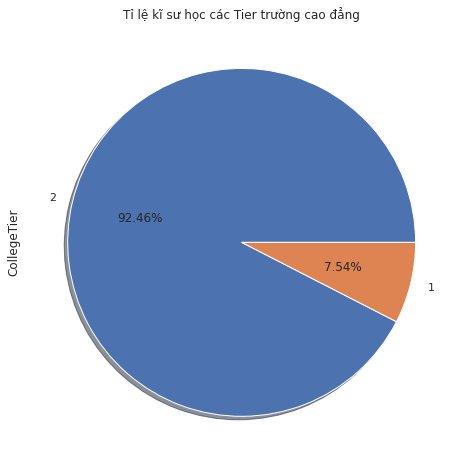

In [14]:
plt.title("Tỉ lệ kĩ sư học các Tier trường cao đẳng")
# Tỉ lệ kĩ sư học ở các Tier trường
tier_percent = dataset["CollegeTier"].value_counts(normalize=True)
# In ra tier và tỉ lệ kĩ sư theo học
for tier, percent in zip(tier_percent.index, tier_percent.values):
    print(f"Kĩ sư học trường Tier {tier} chiếm {round(percent*100, 2)} (%)")
# Plot biểu đồ tròn
tier_percent.plot.pie(figsize=(8, 8), shadow=True, autopct='%1.2f%%')

#### Encode chuyên ngành và giới tính sang dạng số để dễ đánh giá 

Chuyên ngành

In [15]:
# List các chuyên ngành
list_specialization = dataset["Specialization"].unique()

# Hàm lấy index của 1 chuyên ngành
def Spec_Index(spec):
    return np.where(list_specialization==spec)[0][0]

# Hàm lấy tên chuyên ngành ứng với index
def Spec_Name(index):
    return list_specialization[index]

# Tạo thêm cột chứa nhãn dạng index của chuyên ngành
dataset["Specialization (idx)"] = dataset["Specialization"].apply(lambda s:Spec_Index(s))

Giới tính

In [16]:
dataset["Gender (idx"] = dataset["Gender"].apply(lambda g:1 if g=="Male" else 0)

#### Các yếu tố (biến) ảnh hưởng đến nhau như thế nào ?
Đối với Lương :  
- Điểm GPA có tương quan thuận nhiều nhất với lương.

- Tier trường có tương quan nghịch, do trường Tier 1 được đánh giá cao hơn Tier 2.

- Giới tính có tương quan với lương nhưng không quá lớn.

- Chuyên ngành có tương quan với lương nhưng không đáng kể.

<AxesSubplot:title={'center':'Bản đồ nhiệt tương quan giữa các biến'}>

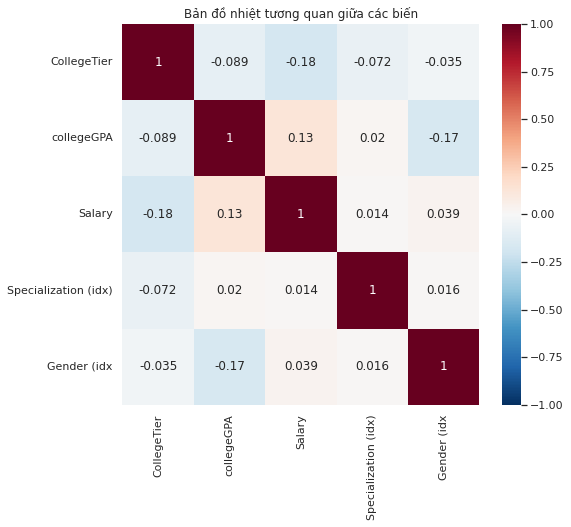

In [17]:
plt.figure(figsize=(8, 7))
plt.title("Bản đồ nhiệt tương quan giữa các biến")
sns.heatmap(dataset.corr(), data=dataset, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')

#### Phân bố lương
- Phân bố lương của các kĩ sư trải rất rộng.

- Xuất hiện khá nhiều thiên lệch kể từ khoảng 700.000 chứng tỏ có nhiều kĩ sư đang nhận mức lương rất tốt so với đa số còn lại.

- Chỉ có 2 kĩ sư có mức lương cao vượt trội (trên 3.500.000).

Lương kĩ sư nằm trong khoảng 35000 đến 4000000


<AxesSubplot:title={'center':'Phân bố lương'}, xlabel='Salary'>

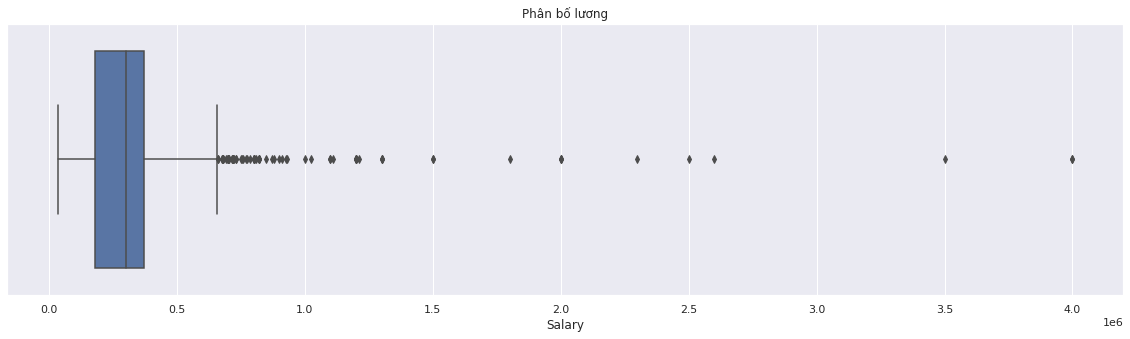

In [18]:
print(f"Lương kĩ sư nằm trong khoảng {min(dataset.Salary)} đến {max(dataset.Salary)}")
plt.figure(figsize=(20, 5))
plt.title("Phân bố lương")
sns.boxplot(x="Salary", data=dataset)

#### Phân bố lương theo chuyên ngành học

- Mức lương giữa các chuyên ngành học nhìn chung không chênh lệch quá nhiều.

- Ngoại trừ 1 số ngành có quá ít người học thì mức lương thấp hơn.

- Các kĩ sư có mức lương cao tập trung ở các ngành học hot nhưng số lượng không quá lớn.

Mức lương ít phụ thuộc vào chuyên ngành hơn các yếu tố khác.

Text(0, 0.5, 'Mức lương')

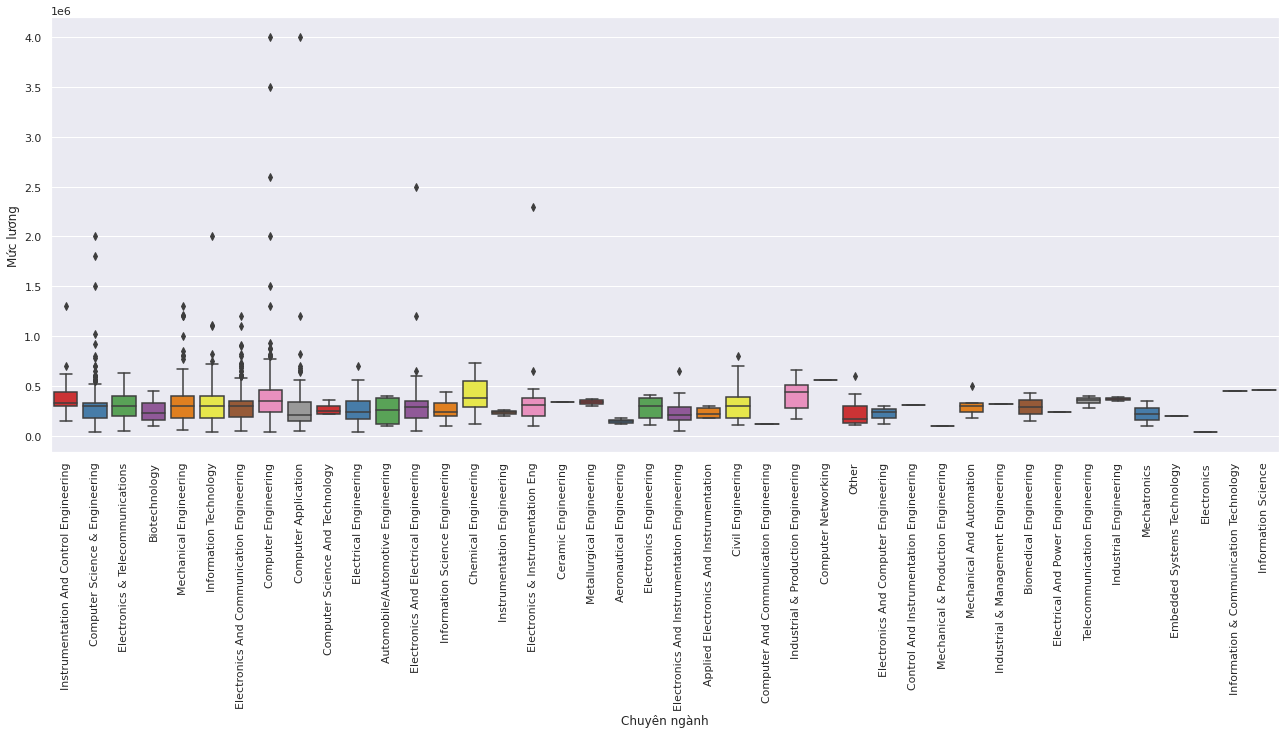

In [19]:
plt.figure(figsize=(22, 8))
sns.boxplot(y="Salary", x="Specialization", data=dataset, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Chuyên ngành")
plt.ylabel("Mức lương")

#### Phân bố lương theo Tier của trường Cao đẳng

- Các kĩ sư học trường Tier 2 có dải lương trải rộng hơn.

- Các mức lương cao đa số thuộc về kĩ sư học trường Tier 2.

- Đa số kĩ sư học ở 2 Tier có mức lương ngang nhau, tập trung chủ yếu dưới 1.500.000.

- Ngoài ra có thể thấy các kĩ sư có lương cao (đặc biệt là 2 kĩ sư lương cao nhât) đều là Nam.

Text(0, 0.5, 'Mức lương')

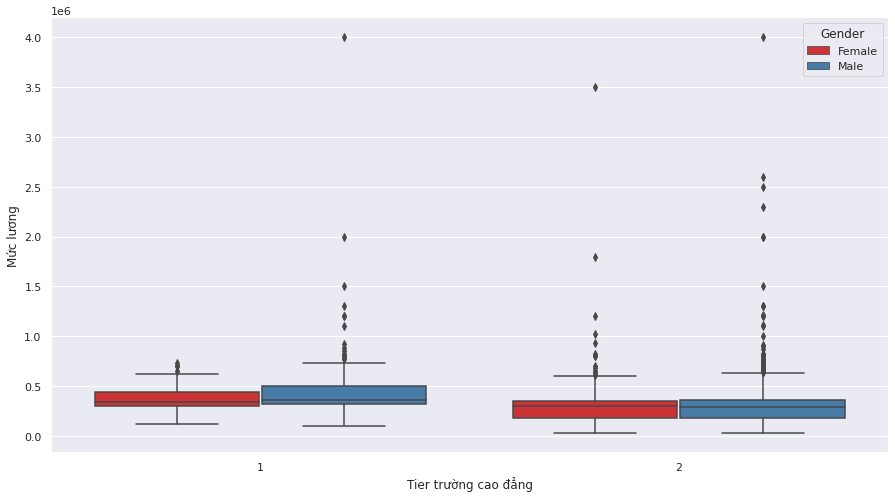

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="CollegeTier", y="Salary", hue="Gender", data=dataset, palette="Set1")
plt.xlabel("Tier trường cao đẳng")
plt.ylabel("Mức lương")

#### Mức lương trung bình ở 2 Tier trường

Trường Tier 1 vẫn có mức lương trung bình cao hơn lý do vì số kĩ sư học Tier 1 ít hơn Tier 2 rất nhiều

In [21]:
dataset.groupby("CollegeTier").mean()["Salary"]

CollegeTier
1    437500.000000
2    294386.363636
Name: Salary, dtype: float64

#### Phân bố lương theo cả điểm GPA và Tier trường cao đẳng
- Đường thẳng hồi quy mức lương theo điểm GPA của cả 2 Tier trường đều có xu hướng đi lên nhưng không nhiều. Chứng tỏ tương quan giữa 2 biến này với lương không quá lớn.

- Mức lương cao chủ yếu thuộc về khoảng GPA 60 - 80 và trường Tier 2.

- Nên có thể nói rằng học trường Tier 1 và điểm GPA cao không thể chắc chắn giúp đạt được mức lương cao.

/home/phuocleoceo/.local/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(25.96, 0.5, 'Mức lương')

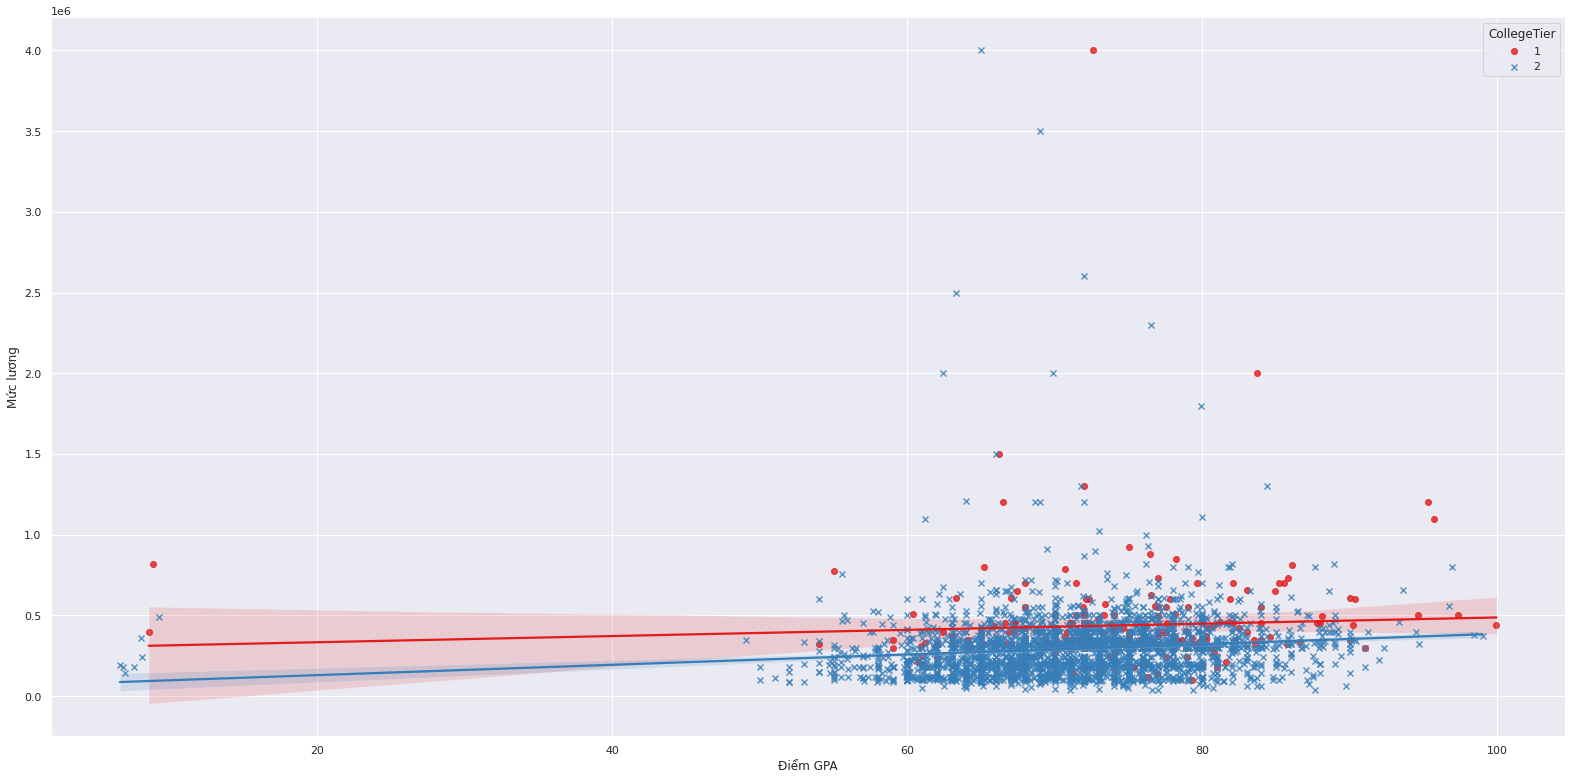

In [22]:
sns.lmplot(x="collegeGPA", y="Salary", hue="CollegeTier", data=dataset, 
            markers=["o","x"], palette="Set1", legend_out=False, height=11, aspect=2)
plt.xlabel("Điểm GPA")
plt.ylabel("Mức lương")

## Nhận xét chung

- Ở khối ngành kĩ thuật thì sự mất cân bằng giới tính là dễ hiểu, số lượng Nam áp đảo Nữ.

- Số lượng kĩ sư học trường Tier 2 lớn hơn nhiều so với trường Tier 1.

- Một số kĩ sư có trình độ vượt trội sẽ nhận mức lương cao hơn nhiều so với mặt bằng chung.

- Kĩ sư tốt nghiệp trường Tier 1 và có điểm GPA cao chưa chắc sẽ có mức lương cao.

- Mức lương cao chủ yếu thuộc về những kĩ sư có GPA mức khá và học từ trường Tier 2.

Vì vậy, điểm số và ngôi trường bạn học không phản ánh đúng về mức lương của bạn, nó phụ thuộc vào năng lực bản thân.
